In [2]:
%matplotlib inline

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import skimage.io
from scipy.ndimage.filters import convolve
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# Lecture demos

## Kaggle
## github awesomedatasets
## UCI machinelearning

In [6]:
tiger_image = skimage.io.imread("tiger.jpg")

In [7]:
tiger_image.shape

(600, 580, 3)

In [9]:
type(tiger_image)

numpy.ndarray

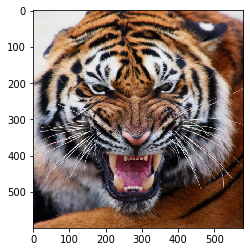

In [11]:
plt.imshow(tiger_image)
# skimage.io.imshow(tiger_image)
plt.show()

In [12]:
tiger_image[0][0] # R G B

array([223, 224, 226], dtype=uint8)

In [14]:
tiger_image[0, 0, 0]

223

In [15]:
tiger_image[0, :, 0] # all values for red on first ROW

array([223, 223, 223, 223, 223, 223, 223, 223, 224, 224, 224, 224, 224,
       224, 224, 224, 224, 225, 225, 226, 227, 227, 227, 227, 227, 227,
       228, 228, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229,
       229, 229, 229, 229, 230, 230, 230, 231, 231, 231, 231, 231, 231,
       231, 231, 232, 232, 232, 232, 232, 232, 232, 232, 232, 232, 233,
       233, 233, 233, 233, 232, 232, 232, 232, 232, 232, 231, 231, 231,
       231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 232, 232,
       232, 232, 232, 233, 233, 233, 233, 233, 233, 233, 234, 234, 234,
       234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234,
       234, 234, 234, 234, 234, 235, 235, 235, 235, 235, 236, 232, 234,
       234, 234, 235, 235, 235, 235, 235, 233, 233, 234, 235, 236, 236,
       236, 231, 228, 222, 222, 222, 219, 212, 207, 208, 213, 215, 212,
       209, 207, 205, 204, 190, 160, 125, 109, 102,  98,  88,  70,  62,
        66,  80,  87,  96, 115, 130, 150, 166, 175, 179, 188, 18

In [57]:
green_channel = tiger_image[:,:,1]
red_channel = tiger_image[:,:,0]
blue_channel = tiger_image[:,:,2]

green_channel

array([[224, 224, 224, ..., 225, 225, 225],
       [224, 224, 224, ..., 225, 225, 225],
       [225, 225, 225, ..., 226, 226, 226],
       ...,
       [161, 159, 156, ...,  39,  38,  38],
       [147, 143, 140, ...,  42,  41,  41],
       [133, 129, 124, ...,  43,  43,  42]], dtype=uint8)

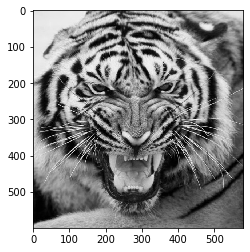

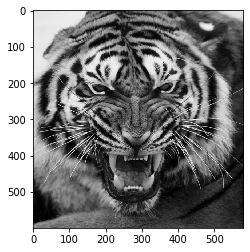

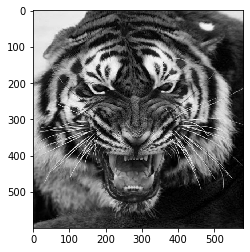

In [24]:
plt.imshow(red_channel, cmap="gray")
plt.show()
plt.imshow(green_channel, cmap="gray")
plt.show()
plt.imshow(blue_channel, cmap="gray")      
plt.show()

In [25]:
red_channel.ravel() # mmulty to 1D array

array([223, 223, 223, ...,  84,  84,  83], dtype=uint8)

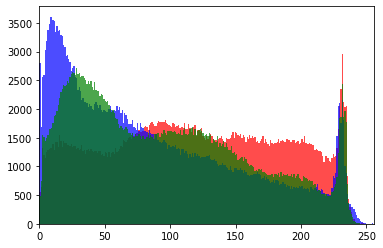

In [30]:
plt.hist(red_channel.ravel(), bins = 256, color = "r", alpha = 0.7)

plt.hist(blue_channel.ravel(), bins = 256, color = "b", alpha = 0.7)

plt.hist(green_channel.ravel(), bins = 256, color = "g", alpha = 0.7)
plt.xlim(0, 256)
plt.show()

In [33]:
grey_image = tiger_image.mean(axis = 2).astype(np.uint8) # mean only for color dimentions
grey_image

array([[224, 224, 224, ..., 225, 225, 225],
       [224, 224, 224, ..., 225, 225, 225],
       [225, 225, 225, ..., 226, 226, 226],
       ...,
       [161, 158, 157, ...,  46,  45,  45],
       [146, 143, 140, ...,  49,  48,  48],
       [133, 129, 125, ...,  50,  50,  49]], dtype=uint8)

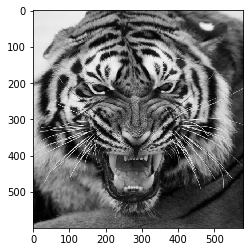

In [38]:
plt.imshow(grey_image, cmap="gray")
plt.show()

In [40]:
gamma_corrected = 0.299 *red_channel + 0.587 * green_channel + 0.114 * blue_channel

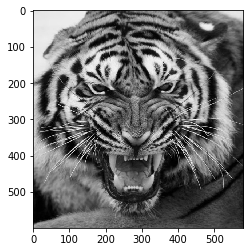

In [41]:
plt.imshow(gamma_corrected, cmap="gray")
plt.show()

# Convolution

In [44]:
kernel = np.array([
    [ 0, -1, 0],    
    [-1,  5, -1],
    [ 0, -1, 0],

])
sharpen_img = convolve(red_channel, kernel)

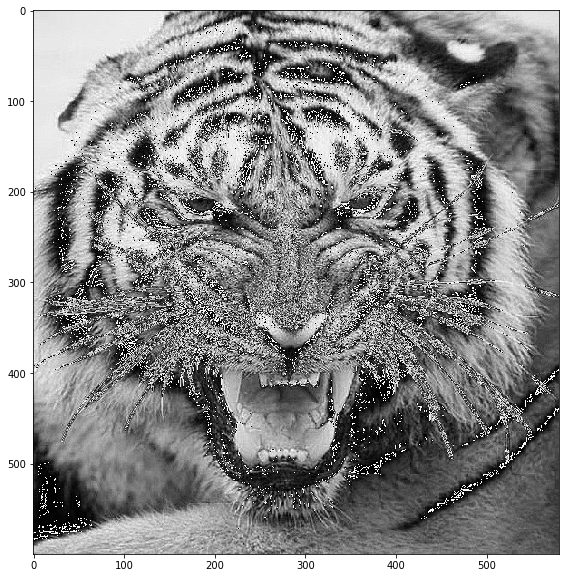

In [49]:
plt.figure(figsize = (10,10) )
plt.imshow(sharpen_img, cmap = 'gray')
plt.show()

In [51]:
combine_image = (red_channel * 0.9 + sharpen_img * 0.1).astype(np.uint8)

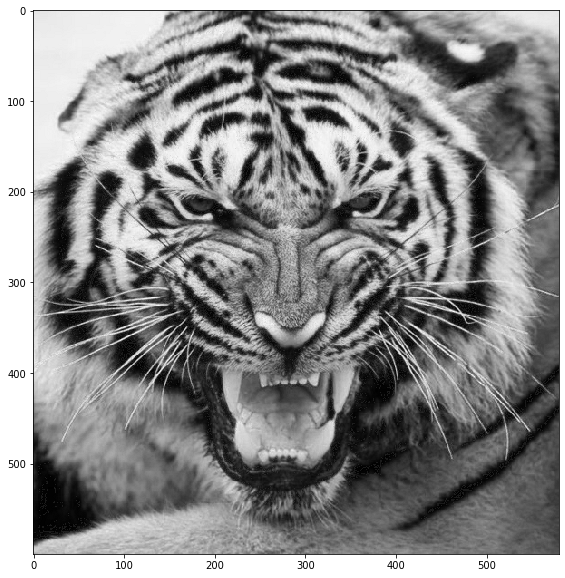

In [52]:
plt.figure(figsize = (10,10) )
plt.imshow(combine_image, cmap = 'gray')
plt.show()

## Tresholding

In [64]:
treshold = 200
is_smaller = red_channel <=treshold
tresholded_image = red_channel.copy()

In [65]:
tresholded_image[is_smaller] = 0
tresholded_image[~is_smaller] = 255
tresholded_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

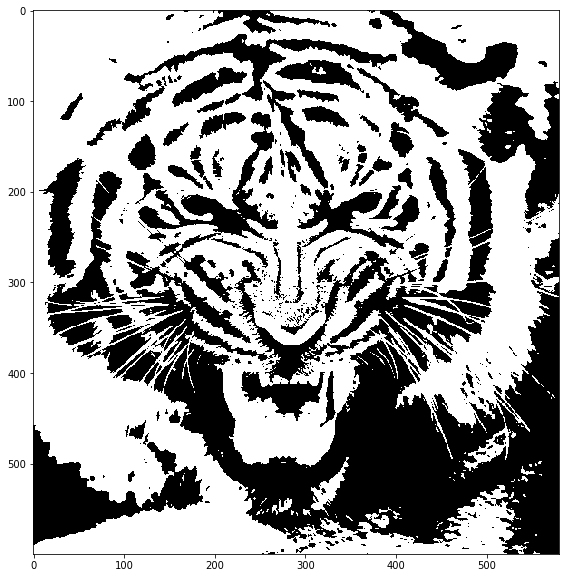

In [66]:
plt.figure(figsize = (10,10) )
plt.imshow(tresholded_image, cmap = 'gray')
plt.show()

## Text processing

In [67]:
alice = ""
with open("alice.txt", "r", encoding="utf-8") as file:
    alice = file.read()

In [69]:
print(alice)




Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Release Date: June 25, 2008 [EBook #11]
Last Updated: October 6, 2016

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***



Produced by Arthur DiBianca and David Widger

















ALICE’S ADVENTURES
IN WONDERLAND


By Lewis Carroll



THE MILLENNIUM FULCRUM EDITION 3.0





Contents
CHAPTER I. 	Down the Rabbit-Hole
CHAPTER II. 	The Pool of Tears
CHAPTER III. 	A Caucus-Race and a Long Tale
CHAPTER IV. 	The Rabbit Sends in a Little Bill
CHAPTER V. 	Advice from a Caterpillar
CHAPTER VI. 	Pig and Pepper
CHAPTER VII. 	A Mad 

In [70]:
alice[3:24]

"Project Gutenberg's A"

In [76]:
counter = Counter(alice)
counter

Counter({'\n': 2266,
         'P': 183,
         'r': 6481,
         'o': 9348,
         'j': 222,
         'e': 15243,
         'c': 2843,
         't': 11754,
         ' ': 29580,
         'G': 182,
         'u': 3926,
         'n': 7926,
         'b': 1638,
         'g': 2766,
         "'": 4,
         's': 7054,
         'A': 674,
         'l': 5111,
         'i': 7881,
         'd': 5275,
         'v': 945,
         'W': 231,
         'a': 9172,
         ',': 2566,
         'y': 2489,
         'L': 116,
         'w': 2725,
         'C': 185,
         'T': 487,
         'h': 7669,
         'B': 119,
         'k': 1209,
         'f': 2259,
         'm': 2272,
         '.': 1217,
         'Y': 100,
         'p': 1805,
         '-': 223,
         ':': 255,
         'R': 167,
         'D': 216,
         'J': 13,
         '2': 11,
         '5': 13,
         '0': 21,
         '8': 11,
         '[': 3,
         'E': 198,
         '#': 1,
         '1': 66,
         ']': 3,
         'U': 64

In [77]:
counter.most_common(30)

[(' ', 29580),
 ('e', 15243),
 ('t', 11754),
 ('o', 9348),
 ('a', 9172),
 ('n', 7926),
 ('i', 7881),
 ('h', 7669),
 ('s', 7054),
 ('r', 6481),
 ('d', 5275),
 ('l', 5111),
 ('u', 3926),
 ('c', 2843),
 ('g', 2766),
 ('w', 2725),
 (',', 2566),
 ('y', 2489),
 ('m', 2272),
 ('\n', 2266),
 ('f', 2259),
 ('p', 1805),
 ('’', 1768),
 ('b', 1638),
 ('.', 1217),
 ('k', 1209),
 ('‘', 1116),
 ('v', 945),
 ('I', 788),
 ('A', 674)]

In [84]:
alice_words = re.split("\W+", alice)
alice_words = [ word.lower() for word in alice_words ]

In [85]:
word_counter = Counter(alice_words)

In [87]:
word_counter.most_common(10)

[('the', 1825),
 ('and', 944),
 ('to', 809),
 ('a', 695),
 ('of', 632),
 ('it', 610),
 ('she', 553),
 ('i', 546),
 ('you', 481),
 ('said', 462)]

In [93]:
nltk.download("stopwords")
# Words that rae met very often and do not bring alot o finformation = STOPWORDS

# from nltk.corpus import stopwords
# stop = set(stopwords.words("english"))
# sentence = "this is a foo bar sentence"
# print([w for w in sentence.lower().split() if w not in stop])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LyubomirGeorgiev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [94]:
stop_wds = set(stopwords.words("english"))

In [95]:
"she" in stop_wds

True

In [96]:
alice_meaningful_words =  [word for word in alice_words if word not in stop_wds]

In [98]:
meaningfu_counter = Counter(alice_meaningful_words)

In [100]:
meaningfu_counter.most_common(50)

[('said', 462),
 ('alice', 404),
 ('little', 129),
 ('one', 106),
 ('gutenberg', 93),
 ('know', 88),
 ('project', 87),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 78),
 ('queen', 76),
 ('thought', 74),
 ('time', 71),
 ('see', 70),
 ('well', 63),
 ('king', 63),
 ('turtle', 60),
 ('way', 58),
 ('began', 58),
 ('mock', 57),
 ('tm', 57),
 ('hatter', 56),
 ('quite', 55),
 ('gryphon', 55),
 ('must', 54),
 ('rabbit', 53),
 ('think', 53),
 ('work', 53),
 ('much', 52),
 ('say', 51),
 ('first', 51),
 ('head', 50),
 ('go', 50),
 ('thing', 49),
 ('never', 48),
 ('voice', 48),
 ('come', 47),
 ('get', 46),
 ('1', 46),
 ('oh', 45),
 ('looked', 45),
 ('got', 45),
 ('mouse', 44),
 ('duchess', 42),
 ('round', 41),
 ('came', 40),
 ('two', 40),
 ('tone', 40),
 ('dormouse', 40)]

In [102]:
stemmer = PorterStemmer()

In [103]:
stemmer.stem("runners")

'runner'

In [104]:
stemmer.stem("running")

'run'

In [105]:
alice_word_stems = [ stemmer.stem(word) for word in alice_meaningful_words]

In [108]:
stem_counter = Counter(alice_word_stems)
stem_counter.most_common(50)

[('said', 462),
 ('alic', 404),
 ('littl', 129),
 ('one', 107),
 ('look', 106),
 ('like', 97),
 ('gutenberg', 93),
 ('know', 92),
 ('project', 87),
 ('work', 86),
 ('would', 83),
 ('went', 83),
 ('thing', 82),
 ('thought', 80),
 ('could', 78),
 ('queen', 77),
 ('time', 77),
 ('go', 77),
 ('see', 71),
 ('say', 70),
 ('get', 68),
 ('think', 64),
 ('king', 64),
 ('well', 63),
 ('turtl', 62),
 ('way', 60),
 ('head', 60),
 ('come', 58),
 ('began', 58),
 ('mock', 57),
 ('hatter', 57),
 ('tm', 57),
 ('use', 55),
 ('much', 55),
 ('quit', 55),
 ('gryphon', 55),
 ('rabbit', 54),
 ('must', 54),
 ('first', 51),
 ('voic', 51),
 ('make', 50),
 ('cat', 50),
 ('never', 48),
 ('1', 46),
 ('oh', 45),
 ('tri', 45),
 ('got', 45),
 ('mous', 44),
 ('turn', 42),
 ('duchess', 42)]

In [113]:
news_groups = fetch_20newsgroups().data

In [114]:
len(news_groups)

11314

In [116]:
print(news_groups[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [118]:
tf_idf = TfidfVectorizer(sublinear_tf=True)

In [121]:
news_group_table = tf_idf.fit_transform(news_groups)

In [126]:
feature_names = tf_idf.get_feature_names()

In [127]:
doc = 0 # Change the index to view another document
feature_index = news_group_table[doc, :].nonzero()[1]
tfidf_scores = zip(feature_index, [news_group_table[doc, x] for x in feature_index])
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    print(w, s)


neighborhood 0.15011369701946967
your 0.04881473888279294
by 0.043018231088399805
brought 0.10672193010291059
il 0.11164602008395892
thanks 0.0628779284737418
mail 0.06834015726492085
please 0.06327266773605324
looking 0.07882443946597921
funky 0.17783891590073847
have 0.03333262984201296
you 0.05720239506891669
info 0.08344137717620602
whatever 0.09363655228158654
or 0.036383581766394356
history 0.0951850348865306
made 0.07232830916921024
production 0.12352755156213552
years 0.06916565193890538
specs 0.12373086931539873
engine 0.11083856411224446
name 0.07986989139611211
model 0.10090833587761044
tellme 0.20185073633745815
can 0.03915403201067274
know 0.048841279870710366
all 0.04232733592809424
body 0.09944837667807775
rest 0.09322800766025226
separate 0.11260690012900645
bumper 0.15152428326248862
front 0.09865590917708651
addition 0.10878632423252817
in 0.02561580603799401
small 0.08586667544568606
really 0.06465158222731526
were 0.056404859513968064
doors 0.13238960004791356
brick